Initial Model Set Up

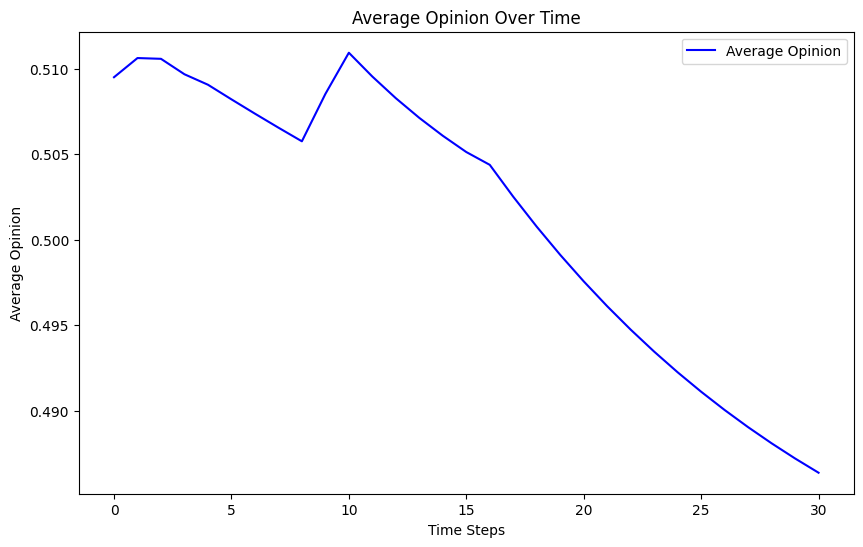

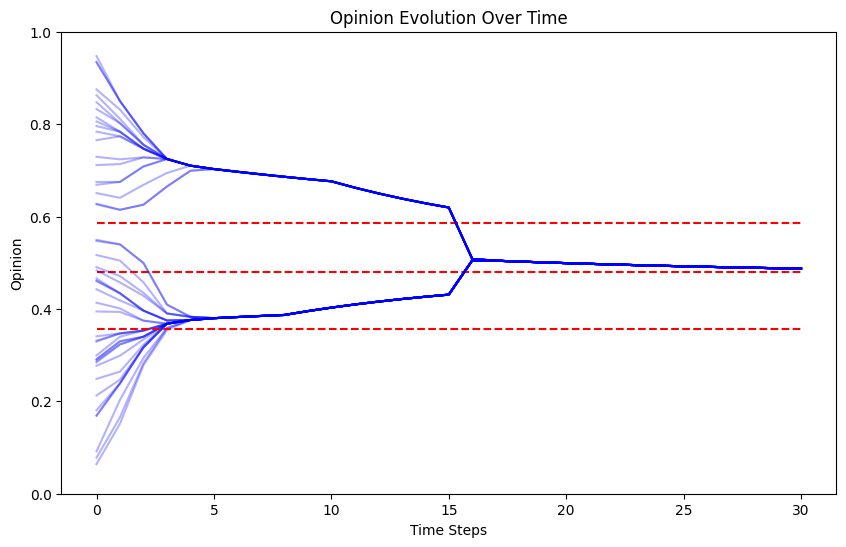

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thurs Nov 07 19:04:06 2024

@author: reemh
"""
import numpy as np
import matplotlib.pyplot as plt

# Opionion Update function
def update_opinions(opinions, R, advertiserList):
    updated_opinions = np.copy(opinions)

    for i in range(len(opinions)):
        if i in advertiserList: # If this is an index in the advertiser list
            continue # Do not update the opinion of advertisers

        influencers = []
        for j in range(len(opinions)):
            # Check if agent j's opinion is within the confidence bound of agent i
            if abs(opinions[i] - opinions[j]) <= R:
                influencers.append(opinions[j])  # Add opinion of influencers to the list

        # Update opinion of agent i by taking the average of opinions in the neighbors list
        if influencers:
            updated_opinions[i] = np.mean(influencers)

    return updated_opinions

# Set Model Parameters
agentsN = 50 # Number of individuals including advertisers
advertisersN = 3 # Number of advertisers
R = 0.2 # confidence bound 
steps = 30 # Number of iterations to update opinion

# Initialize opinions randomly in the range [0, 1]
opinions = np.random.rand(agentsN)

# Select random agents as advertisers
advertiserList = np.random.choice(agentsN, advertisersN, replace=False)

opinion_evolution = [opinions.copy()]
# Run the model for the specified number of iterations
for _ in range(steps):
    opinions = update_opinions(opinions, R, advertiserList)
    opinion_evolution.append(opinions.copy())

# Convert opinion history to a NumPy array
opinion_evolution = np.array(opinion_evolution)

average_opinion = np.mean(opinion_evolution, axis=1)

# Plot the average opinion over time
plt.figure(figsize=(10, 6))
plt.plot(average_opinion, color='blue', label="Average Opinion")
plt.xlabel("Time Steps")
plt.ylabel("Average Opinion")
plt.title("Average Opinion Over Time")
plt.legend()
plt.show()

# Plot opinions
plt.figure(figsize=(10, 6))
for i in range(agentsN):
    if i in advertiserList:
        plt.plot(opinion_evolution[:, i], label=f"Advertiser {i}", linestyle="--", color="red")
    else:
        plt.plot(opinion_evolution[:, i], color="blue", alpha=0.3)

plt.title("Opinion Evolution Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Opinion")
plt.ylim(0, 1)
plt.show()


Poll Update Extension

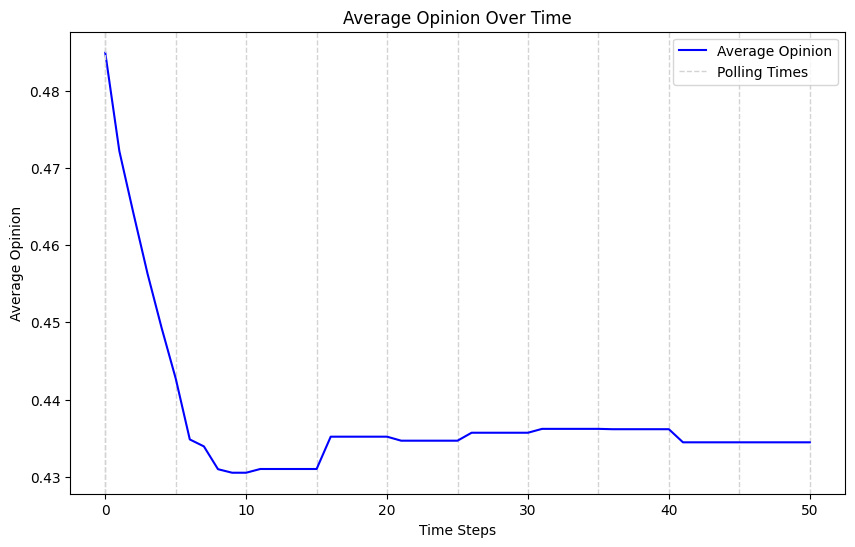

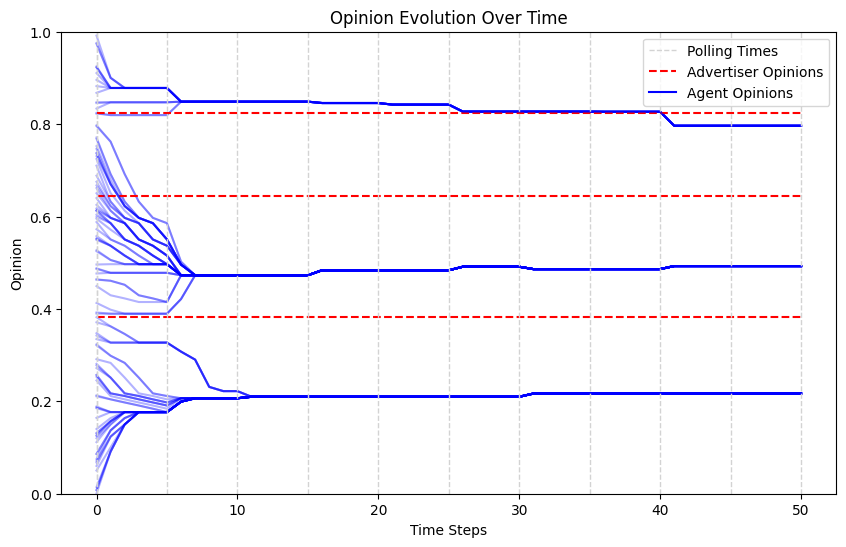

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov  8 00:28:34 2024

@author: jruss
"""

import numpy as np
import matplotlib.pyplot as plt

# Opinion Update function
def update_opinions_poll(opinions, R, advertiserList, poll):
    updated_opinions = np.copy(opinions)

    for i in range(len(opinions)):
        if i in advertiserList: # If this is an index in the advertiser list
            continue # Do not update the opinion of advertisers

        influencers = []
        for j in range(len(poll)):
            # Check if agent j's opinion is within the confidence bound of agent i
            if abs(opinions[i] - poll[j]) <= R:
                influencers.append(poll[j])  # Add opinion of influencers to the list

        # Update opinion of agent i by taking the average of opinions in the neighbors list
        if influencers:
            updated_opinions[i] = np.mean(influencers)

    return updated_opinions

#--------------------------------------------------------------------

# Set Model Parameters
agentsN = 100 # Number of individuals including advertisers
advertisersN = 3 # Number of advertisers
R = 0.2 # confidence bound 
steps = 50 # Number of iterations to update opinion

poll_period = 5
samples = 50

#---------------------------------------------------------------------

# Initialize opinions randomly in the range [0, 1]
opinions = np.random.rand(agentsN)

# Select random agents as advertisers
advertiserList = np.random.choice(agentsN, advertisersN, replace=False)

opinion_evolution = [opinions.copy()]

# The strange indexing works for the code later
poll_iterations = np.arange(-1, steps, poll_period)

# Begins the first poll
poll = np.random.choice(opinions, samples)

# Run the model for the specified number of iterations
for _ in range(steps):
    opinions = update_opinions_poll(opinions, R, advertiserList, poll)
    opinion_evolution.append(opinions.copy())
    if _ in poll_iterations:
        poll = np.random.choice(opinions, samples)

# Convert opinion history to a NumPy array
opinion_evolution = np.array(opinion_evolution)

average_opinion = np.mean(opinion_evolution, axis=1)

# Plot the average opinion over time
plt.figure(figsize=(10, 6))

# Add vertical lines for each poll iteration
for iteration in poll_iterations:
    plt.axvline(x=iteration + 1, color="lightgray", linestyle="--", linewidth=1)

plt.plot(average_opinion, color='blue', label="Average Opinion")
plt.xlabel("Time Steps")
plt.ylabel("Average Opinion")
plt.title("Average Opinion Over Time")
plt.axvline(x=0, color="lightgray", linestyle="--", linewidth=1, label="Polling Times")
plt.legend()
plt.show()

# Plot opinions
plt.figure(figsize=(10, 6))
for i in range(agentsN):
    if i in advertiserList:
        plt.plot(opinion_evolution[:, i], linestyle="--", color="red")
    else:
        plt.plot(opinion_evolution[:, i], color="blue", alpha=0.3)

# Add vertical lines for each poll iteration
for iteration in poll_iterations:
    plt.axvline(x=iteration + 1, color="lightgray", linestyle="--", linewidth=1)

plt.title("Opinion Evolution Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Opinion")
plt.axvline(x=0, color="lightgray", linestyle="--", linewidth=1, label="Polling Times")
plt.plot([], [], color="red", linestyle="--", label="Advertiser Opinions")
plt.plot([], [], color="blue", label="Agent Opinions")
plt.legend()
plt.ylim(0, 1)
plt.show()

Rounded Score Extension

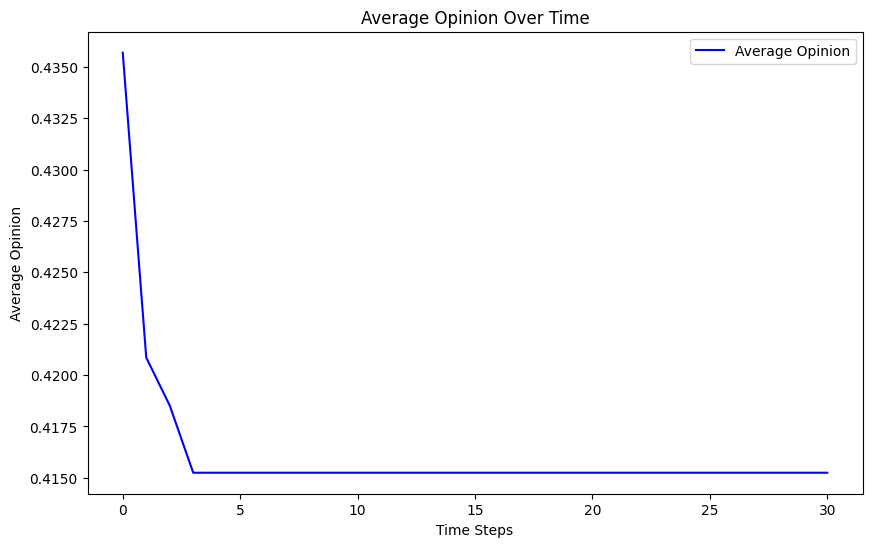

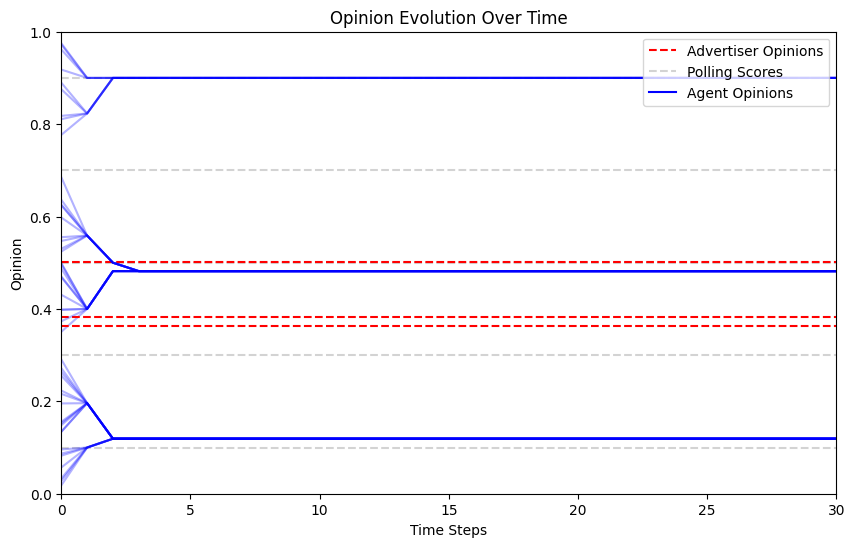

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Fri Nov  8 00:18:49 2024

@author: jruss
"""

import numpy as np
import matplotlib.pyplot as plt


def poll_rounding(opinion, poll_scoring):
    return min(poll_scoring, key=lambda x: abs(x - opinion))

# Opinion Update function
def update_opinions_rounded(opinions, R, advertiserList, poll_scoring):
    updated_opinions = np.copy(opinions)

    for i in range(len(opinions)):
        if i in advertiserList: # If this is an index in the advertiser list
            continue # Do not update the opinion of advertisers

        influencers = []
        for j in range(len(opinions)):
            # Check if agent j's opinion is within the confidence bound of agent i
            rounded_opinion = poll_rounding(opinions[j], poll_scoring)
            
            if abs(opinions[i] - rounded_opinion) <= R:
                influencers.append(rounded_opinion)  # Add opinion of influencers to the list

        # Update opinion of agent i by taking the average of opinions in the neighbors list
        if influencers:
            updated_opinions[i] = np.mean(influencers)

    return updated_opinions

#-------------------------------------------------------------------------------

# Set Model Parameters
agentsN = 50 # Number of individuals including advertisers
advertisersN = 3 # Number of advertisers
R = 0.2 # confidence bound 
steps = 30 # Number of iterations to update opinion
poll_scoring = [0.1, 0.3, 0.5, 0.7, 0.9] # Scores that opinions are rounded too in poll

#--------------------------------------------------------------------------------

# Initialize opinions randomly in the range [0, 1]
opinions = np.random.rand(agentsN)

# Select random agents as advertisers
advertiserList = np.random.choice(agentsN, advertisersN, replace=False)

opinion_evolution = [opinions.copy()]
# Run the model for the specified number of iterations
for _ in range(steps):
    opinions = update_opinions_rounded(opinions, R, advertiserList, poll_scoring)
    opinion_evolution.append(opinions.copy())

# Convert opinion history to a NumPy array
opinion_evolution = np.array(opinion_evolution)

average_opinion = np.mean(opinion_evolution, axis=1)

# Plot the average opinion over time
plt.figure(figsize=(10, 6))
plt.plot(average_opinion, color='blue', label="Average Opinion")
plt.xlabel("Time Steps")
plt.ylabel("Average Opinion")
plt.title("Average Opinion Over Time")
plt.legend()
plt.show()

# Plot opinions
plt.figure(figsize=(10, 6))

for score in poll_scoring:
    plt.axhline(y=score, color='lightgray', linestyle='--')
    
for i in range(agentsN):
    if i in advertiserList:
        plt.plot(opinion_evolution[:, i], linestyle="--", color="red")
    else:
        plt.plot(opinion_evolution[:, i], color="blue", alpha=0.3)

plt.title("Opinion Evolution Over Time")
plt.xlabel("Time Steps")
plt.ylabel("Opinion")
plt.ylim(0, 1)
plt.xlim(0, steps)
plt.plot([], [], color="red", linestyle="--", label="Advertiser Opinions")
plt.plot([], [], color="lightgray", linestyle="--", label="Polling Scores")
plt.plot([], [], color="blue", label="Agent Opinions")
plt.legend(loc="upper right")
plt.show()